In [80]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib as mpt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
import seaborn as sns
import scipy.stats as st
import matplotlib.colors as colors
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

In [81]:
cars = pd.read_csv('cars.csv')
pd.isna(cars).sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [82]:
cars.dtypes

mpg             float64
 cylinders        int64
 cubicinches     object
 hp               int64
 weightlbs       object
 time-to-60       int64
 year             int64
 brand           object
dtype: object

In [83]:
print(cars.columns)

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')


In [84]:
cars[' cubicinches']=pd.to_numeric(cars[' cubicinches'], errors='coerce')
cars[' weightlbs']=pd.to_numeric(cars[' weightlbs'], errors='coerce')
pd.isna(cars).sum()

mpg             0
 cylinders      0
 cubicinches    2
 hp             0
 weightlbs      3
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [85]:
df = cars.dropna(how = 'any')
pd.isna(df).sum()

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [88]:
x= df[[' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',' year']]
y= df["mpg"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, train_size=0.75, random_state = 6)
model1 = sm.OLS(ytrain, sm.add_constant(xtrain)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     117.2
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           2.69e-60
Time:                        13:08:41   Log-Likelihood:                -515.04
No. Observations:                 192   AIC:                             1044.
Df Residuals:                     185   BIC:                             1067.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1517.1700    155.422     -9.762      0.000   -1823.797   -1210.543
 cylinders      -0.0768      0.511     -0.150      0.881      -1.086       0.932
 cubicinches     0.0049      0.011      0.436      0.663      -0.017       0.027
 hp              0.0051      0.023      0.227      0.821      -0.040       0.050
 weightlbs      -0.0070      0.001     -7.293      0.000      -0.009      -0.005
 time-to-60      0.2746      0.151      1.824      0.070      -0.022       0.572
 year            0.7872      0.078     10.035      0.000       0.632       0.942
==============================================================================
Omnibus:                       19.427   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.682
Skew:                           0.631   Prob(JB):                     1.61e-06
Kurtosis:                       4.319   Cond. No.                     2.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
x= df[[' cylinders', ' cubicinches', ' weightlbs', ' time-to-60',' year']]
y= df["mpg"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 7)
model1 = sm.OLS(ytrain, sm.add_constant(xtrain)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     175.3
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           2.16e-68
Time:                        13:08:42   Log-Likelihood:                -499.50
No. Observations:                 192   AIC:                             1011.
Df Residuals:                     186   BIC:                             1031.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1376.5215    139.777     -9.848      0.000   -1652.273   -1100.770
 cylinders      -0.4208      0.441     -0.954      0.341      -1.291       0.449
 cubicinches     0.0105      0.009      1.170      0.243      -0.007       0.028
 weightlbs      -0.0067      0.001     -8.668      0.000      -0.008      -0.005
 time-to-60      0.3147      0.110      2.864      0.005       0.098       0.531
 year            0.7159      0.071     10.115      0.000       0.576       0.856
==============================================================================
Omnibus:                        9.008   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.320
Skew:                           0.436   Prob(JB):                      0.00947
Kurtosis:                       3.636   Cond. No.                     2.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
x= df[[ ' cubicinches', ' weightlbs', ' time-to-60',' year']]
y= df["mpg"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 8)
model1 = sm.OLS(ytrain, sm.add_constant(xtrain)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     201.9
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           1.07e-66
Time:                        13:08:42   Log-Likelihood:                -505.38
No. Observations:                 192   AIC:                             1021.
Df Residuals:                     187   BIC:                             1037.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1446.4864    149.575     -9.671      0.000   -1741.558   -1151.415
 cubicinches    -0.0012      0.007     -0.162      0.871      -0.015       0.013
 weightlbs      -0.0063      0.001     -7.701      0.000      -0.008      -0.005
 time-to-60      0.1940      0.118      1.645      0.102      -0.039       0.427
 year            0.7515      0.076      9.916      0.000       0.602       0.901
==============================================================================
Omnibus:                       25.398   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.479
Skew:                           0.716   Prob(JB):                     9.84e-10
Kurtosis:                       4.771   Cond. No.                     2.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
x= df[[' weightlbs', ' time-to-60',' year']]
y= df["mpg"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 8)
model1 = sm.OLS(ytrain, sm.add_constant(xtrain)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     270.5
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           6.07e-68
Time:                        13:08:43   Log-Likelihood:                -505.40
No. Observations:                 192   AIC:                             1019.
Df Residuals:                     188   BIC:                             1032.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1449.9847    147.626     -9.822      0.000   -1741.202   -1158.768
 weightlbs     -0.0064      0.000    -19.252      0.000      -0.007      -0.006
 time-to-60     0.2032      0.103      1.972      0.050   -4.48e-05       0.406
 year           0.7533      0.075     10.069      0.000       0.606       0.901
==============================================================================
Omnibus:                       24.858   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.300
Skew:                           0.705   Prob(JB):                     1.77e-09
Kurtosis:                       4.746   Cond. No.                     2.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
ypred =model1.predict(sm.add_constant(xtest))
r2=r2_score(ytest, ypred)
r2

0.7757087073298922

In [93]:
df.columns = df.columns.str.strip() 
df = df.copy()
df.loc[:,'hp^2']= df['hp'] ** 2
df.loc[:,'hp^3']= df['hp'] ** 3
x1 = df[['hp']]
x2 = df[['hp','hp^2']]
x3 = df[['hp','hp^2', 'hp^3']]
y = df['mpg']

In [94]:
x1train, x1test, y1train, y1test = train_test_split(x1, y, test_size=0.2, random_state = 3)
modelL = sm.OLS(y1train, sm.add_constant(x1train)).fit()
modelL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     300.0
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           8.54e-42
Time:                        13:08:45   Log-Likelihood:                -614.57
No. Observations:                 204   AIC:                             1233.
Df Residuals:                     202   BIC:                             1240.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.6160      0.962     40.127      0.000      36.719      40.514
hp            -0.1446      0.008    -17.320      0.000      -0.161      -0.128
==============================================================================
Omnibus:                       12.662   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.261
Skew:                           0.567   Prob(JB):                      0.00132
Kurtosis:                       3.525   Cond. No.                         320.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
y1pred =modelL.predict(sm.add_constant(x1test))
r2=r2_score(y1test, y1pred)
r2

0.6395034068883654

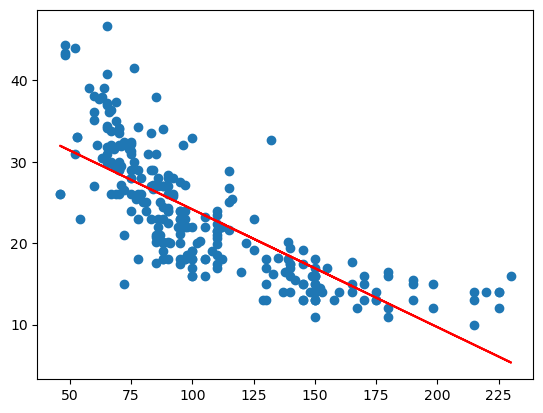

In [67]:
plt.scatter(x1, y , marker='o');
plt.plot(x1, 38.6160 - 0.1446* x1, color = 'red' );
plt.show()

In [68]:
x2train, x2test, y2train, y2test = train_test_split(x2, y, test_size=0.2, random_state = 99)
modelQ = sm.OLS(y2train, sm.add_constant(x2train)).fit()
modelQ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     223.5
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           8.07e-52
Time:                        12:52:30   Log-Likelihood:                -593.50
No. Observations:                 204   AIC:                             1193.
Df Residuals:                     201   BIC:                             1203.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.1444      2.398     24.248      0.000      53.416      62.873
hp            -0.4868      0.041    -11.910      0.000      -0.567      -0.406
hp^2           0.0013      0.000      8.402      0.000       0.001       0.002
==============================================================================
Omnibus:                       11.821   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               22.590
Skew:                           0.243   Prob(JB):                     1.24e-05
Kurtosis:                       4.556   Cond. No.                     1.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
y2pred =modelQ.predict(sm.add_constant(x2test))
r2=r2_score(y2test, y2pred)
r2

0.7591429464426147

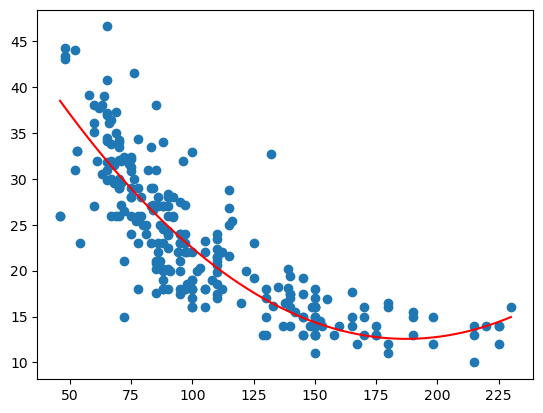

In [70]:
plt.scatter(x1, y);
x11=np.linspace(46, 230, 1000)
y1 = 58.1444 - 0.4868* x11 + 0.0013* x11**2
plt.plot(x11, y1 , color = 'red' );
plt.show()

In [96]:
x3train, x3test, y3train, y3test = train_test_split(x3, y, test_size=0.2, random_state = 199)
modelC = sm.OLS(y3train, sm.add_constant(x3train)).fit()
modelC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     215.6
Date:                Wed, 23 Oct 2024   Prob (F-statistic):           2.13e-62
Time:                        13:38:55   Log-Likelihood:                -565.29
No. Observations:                 204   AIC:                             1139.
Df Residuals:                     200   BIC:                             1152.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.1010      5.727     13.289      0.000      64.808      87.394
hp            -0.9588      0.148     -6.496      0.000      -1.250      -0.668
hp^2           0.0051      0.001      4.328      0.000       0.003       0.007
hp^3       -9.332e-06   2.93e-06     -3.188      0.002   -1.51e-05   -3.56e-06
==============================================================================
Omnibus:                       18.116   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.281
Skew:                           0.359   Prob(JB):                     6.59e-10
Kurtosis:                       5.112   Cond. No.                     5.99e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
y3pred =modelC.predict(sm.add_constant(x3test))
r2_score(y3test, y3pred)

0.4250219706029924

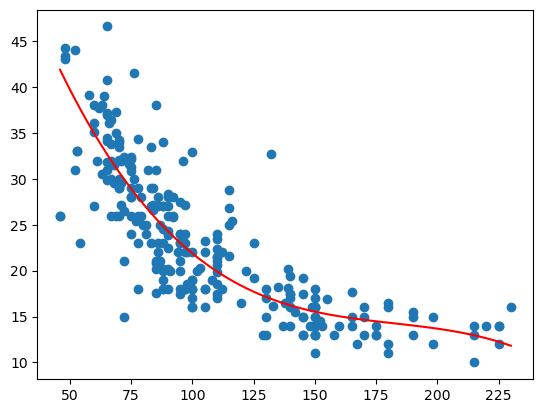

In [98]:
plt.scatter(x1, y);
x12=np.linspace(46, 230, 1000)
y1 = 76.1010 -0.9588* x12 + 0.0051* x12**2 + -9.332e-06 * x12**3
plt.plot(x12, y1 , color = 'red' );
plt.show()